## Data Science: Assignment 1 - Web Scraping
### Name: Sarvesh Anand Mankar
### Roll No: 142203013


## Assignment Description
The assignment is to scrape the data from the website https://en.wikipedia.org/wiki/2020_Summer_Olympics_medal_table and store it in a csv file. Perform some data cleaning and analysis on the data. The data is to be stored in a csv file named "medal_table.csv". Plot the data using matplotlib and seaborn.

In [2]:
# %pip install requests
# %pip install bs4
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://en.wikipedia.org/wiki/2020_Summer_Olympics_medal_table'
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "lxml")

gdp_table = soup.find("table", attrs={"class": "wikitable sortable plainrowheaders jquery-tablesorter"})
gdp_table_data = gdp_table.tbody.find_all("tr") 

In [4]:
headings = []
for td in gdp_table_data[0].find_all("th"):
    headings.append(td.text.replace('\n', ' ').strip())

print(headings)

['Rank', 'NOC', 'Gold', 'Silver', 'Bronze', 'Total']


In [5]:
data = []

for i in range(1, len(gdp_table_data)):
    tds = gdp_table_data[i].find_all("td")
    fds = gdp_table_data[i].find_all("a")
    try:
        fds=fds[0].text
    except:
        break

    values = [td.text.replace('\n', ' ').strip() for td in tds]
    values.insert(1,fds)
    data.append(values)

In [6]:
df = pd.DataFrame(data, columns=headings)

df['Rank'] = pd.to_numeric(df['Rank'])
df['Gold'] = pd.to_numeric(df['Gold'])
df['Silver'] = pd.to_numeric(df['Silver'])
df['Bronze'] = pd.to_numeric(df['Bronze'])
df['Total'] = pd.to_numeric(df['Total'])
df['NOC'] = df['NOC'].astype(str)

print(df.head())

df.to_csv('medal_table.csv', index=False)


   Rank            NOC  Gold  Silver  Bronze  Total
0     1  United States    39      41      33  113.0
1     2          China    38      32      19   89.0
2     3          Japan    27      14      17   58.0
3     4  Great Britain    22      20      22   64.0
4     5            ROC    20      28      23   71.0


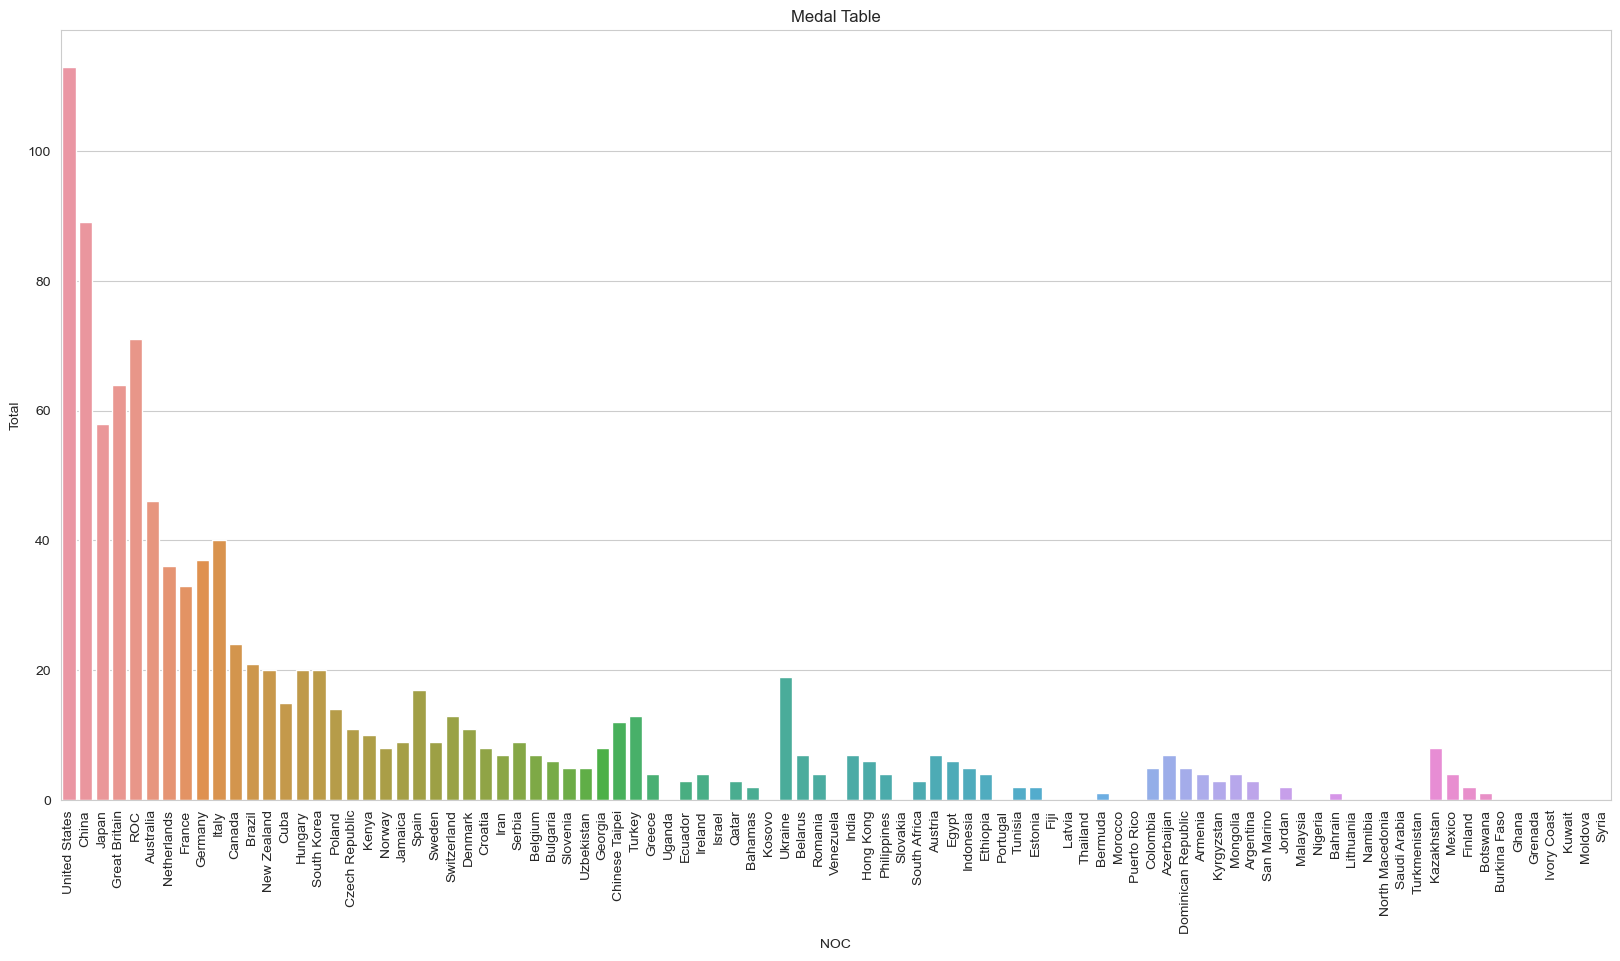

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
plt.title('Medal Table')
plt.xlabel('Countries')
plt.ylabel('Total Medals')
plt.xticks(rotation=90)
sns.barplot(x='NOC', y='Total', data=df)
plt.savefig('medal_table.png')
plt.show()


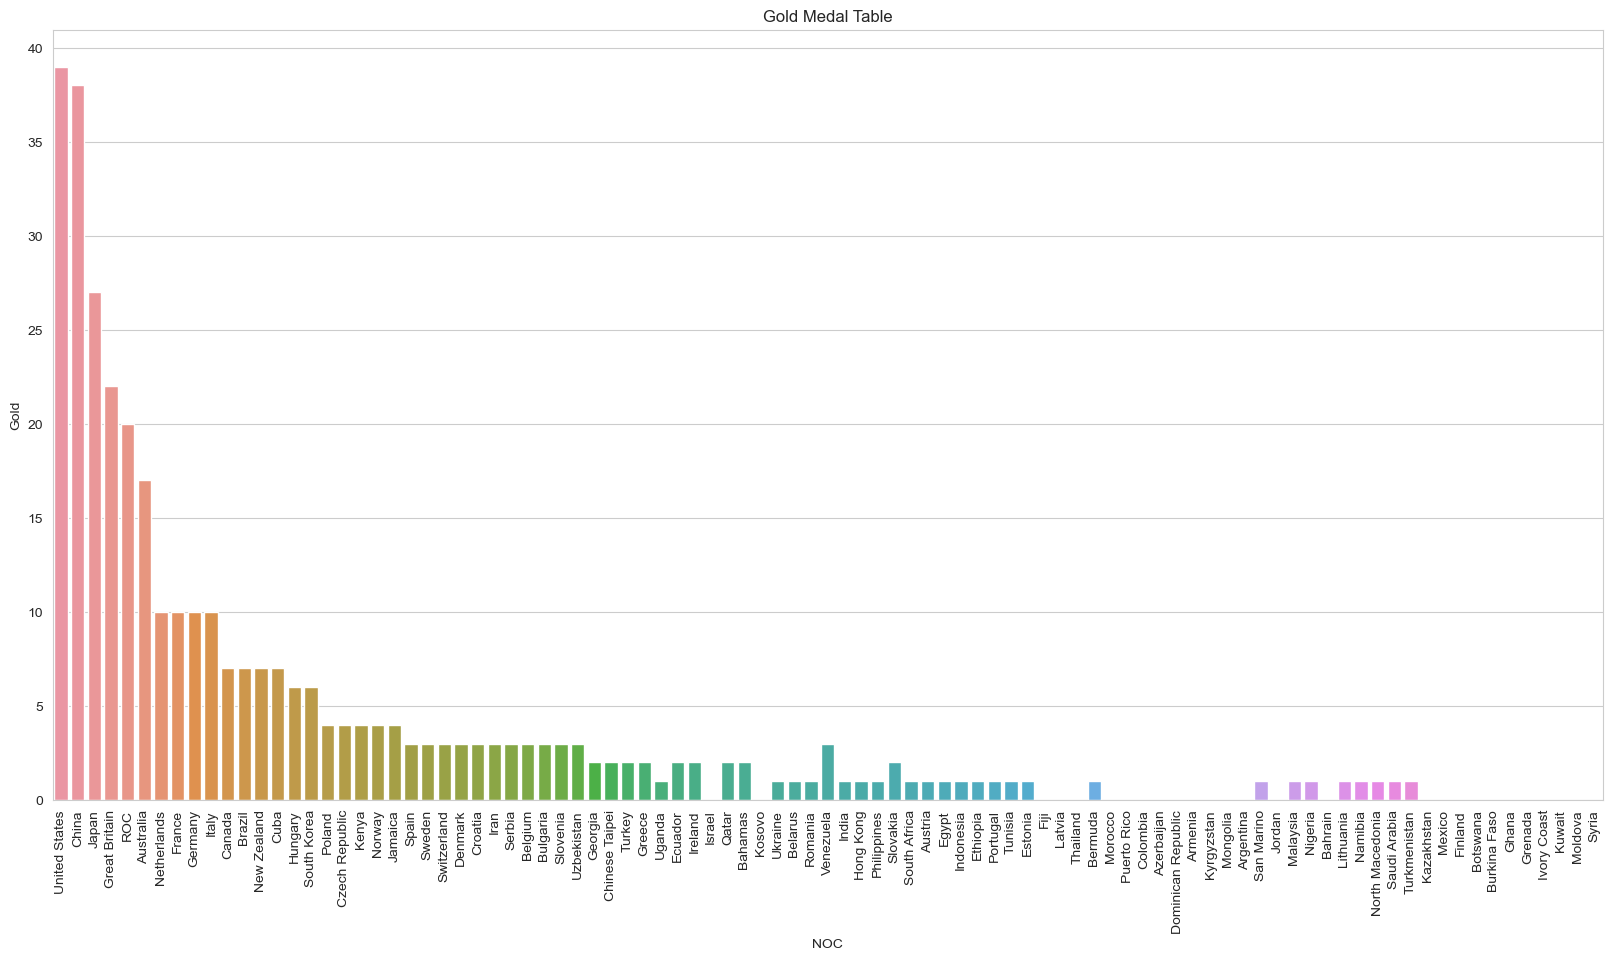

In [9]:
plt.figure(figsize=(20, 10))
plt.title('Gold Medal Table')
plt.xlabel('Countries')
plt.ylabel('Gold Medals')
plt.xticks(rotation=90)
sns.barplot(x='NOC', y='Gold', data=df)
plt.savefig('gold_medal_table.png')
plt.show()



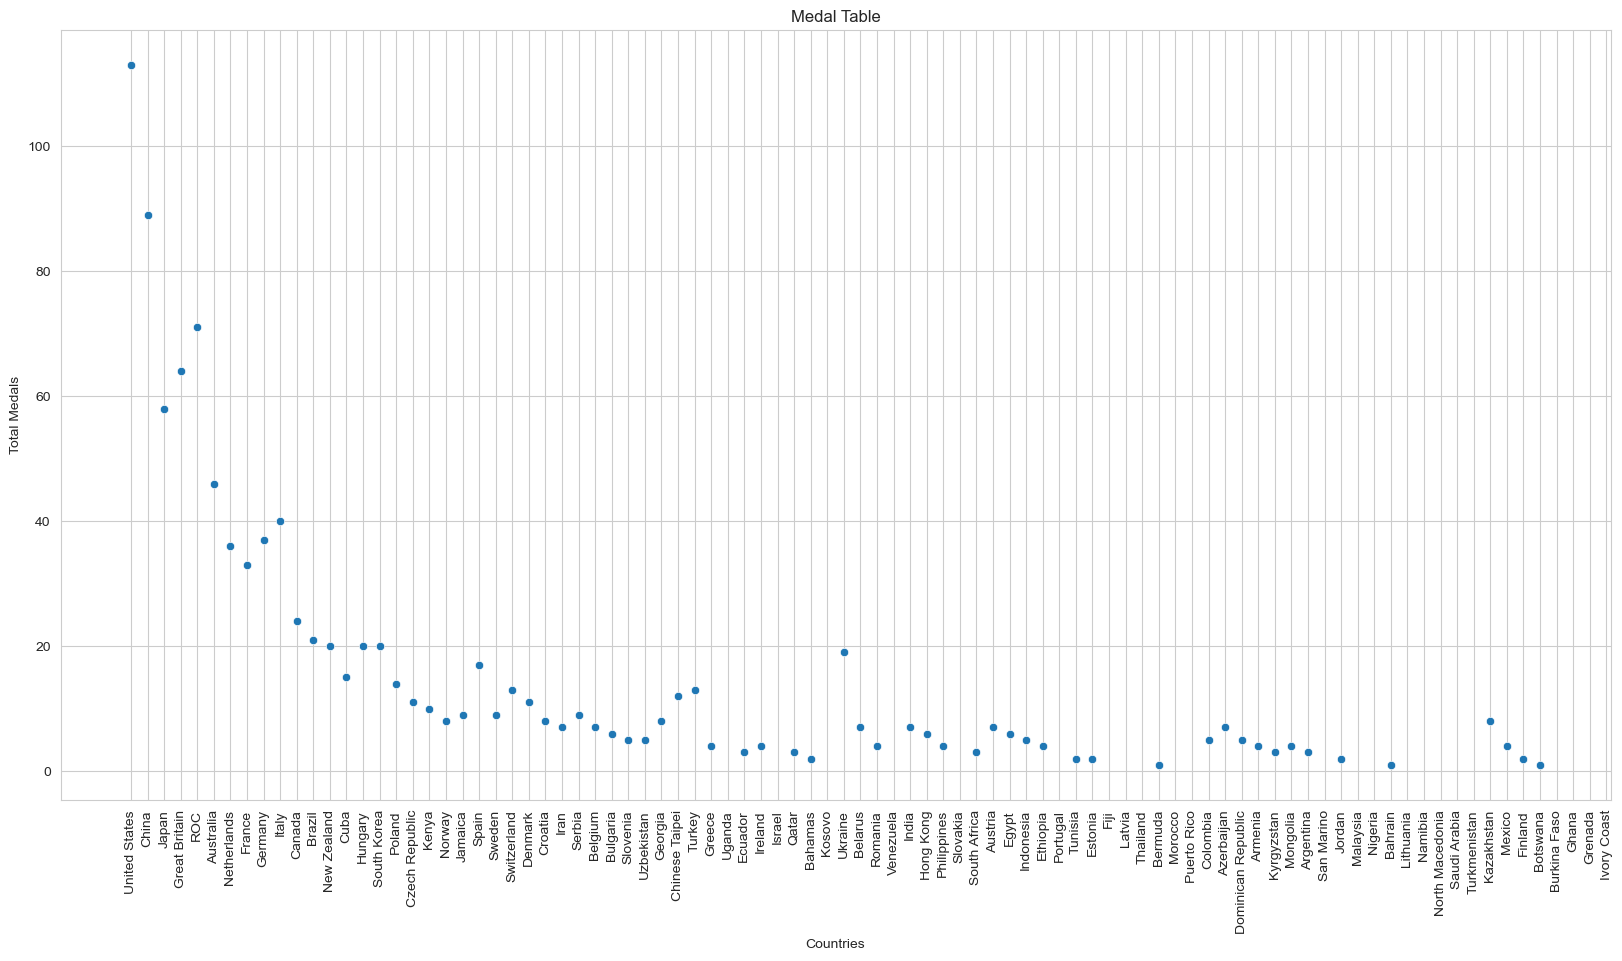

In [10]:
plt.figure(figsize=(20, 10))
plt.title('Medal Table')
plt.xlabel('Countries')
plt.ylabel('Total Medals')
plt.xticks(rotation=90)
sns.scatterplot(x='NOC', y='Total', data=df)
plt.savefig('medal_table_scatter.png')

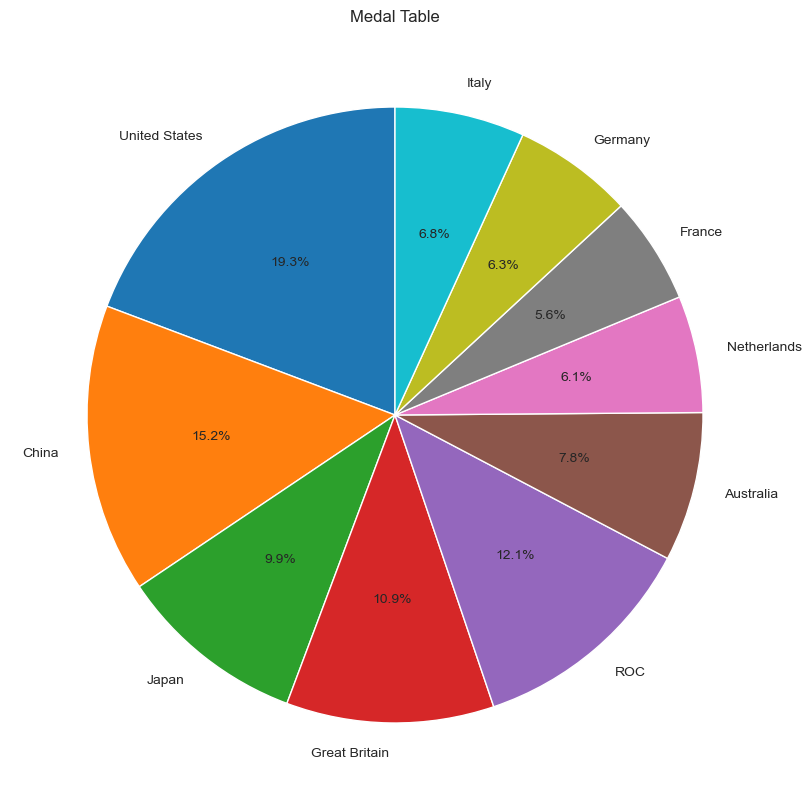

In [11]:
plt.figure(figsize=(20, 10))
plt.title('Medal Table')
plt.pie(df['Total'].head(10), labels=df['NOC'].head(10), autopct='%1.1f%%', startangle=90)
plt.savefig('medal_table_pie.png')
plt.show()


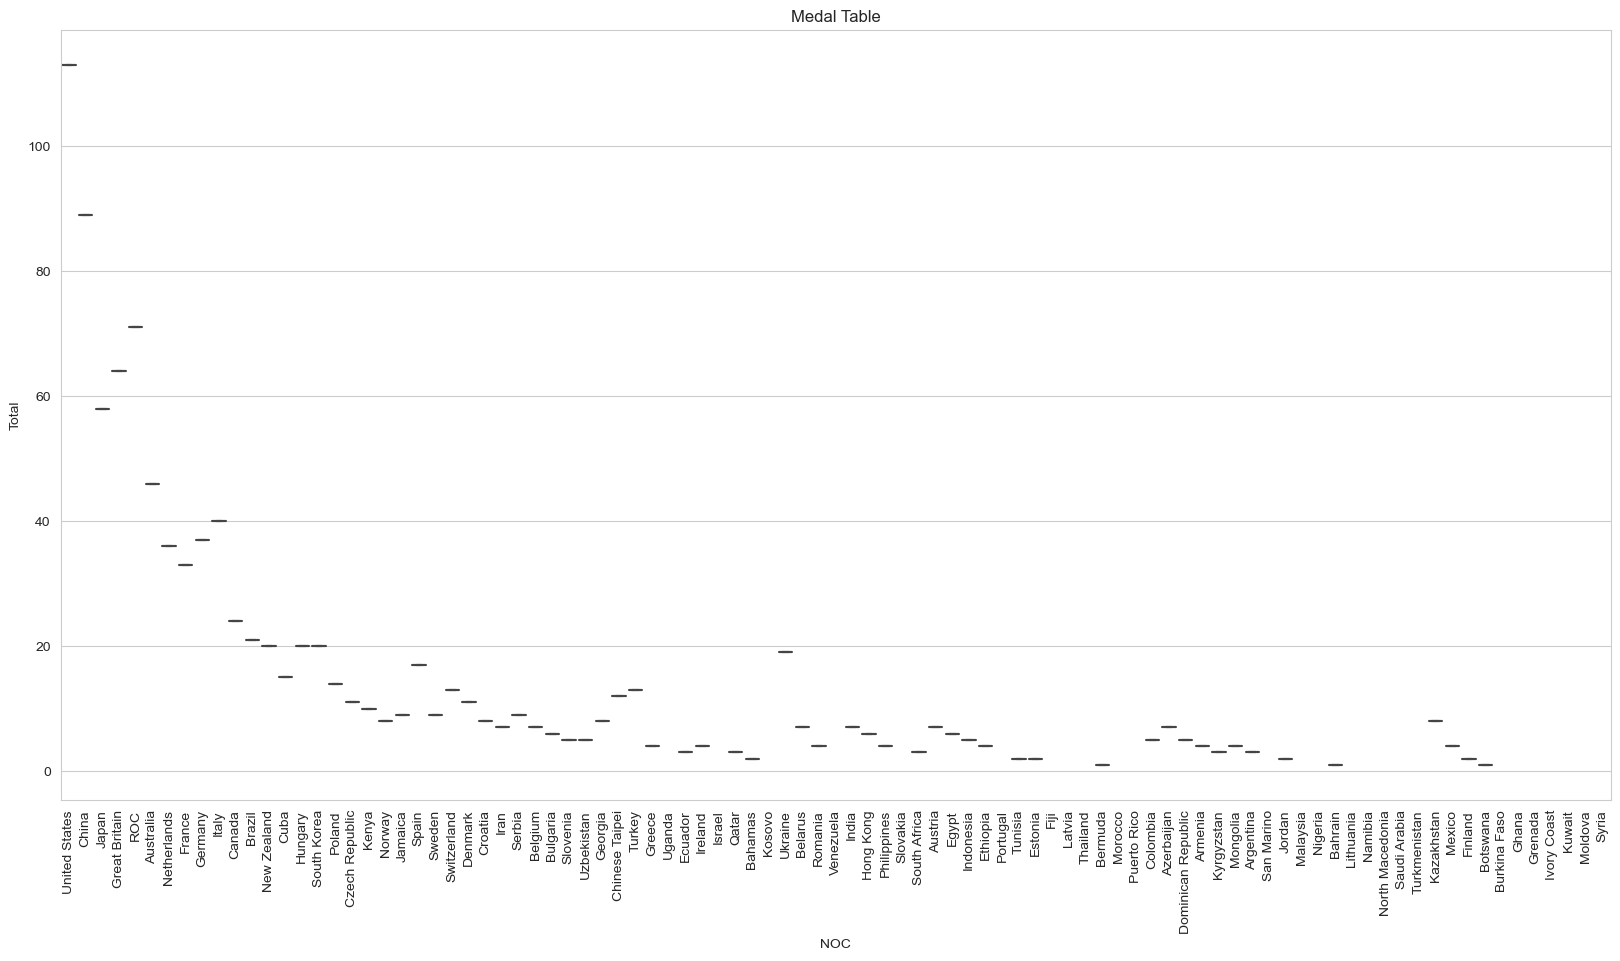

In [12]:
plt.figure(figsize=(20, 10))
plt.title('Medal Table')
plt.xlabel('Countries')
plt.ylabel('Total Medals')
plt.xticks(rotation=90)
sns.boxplot(x='NOC', y='Total', data=df)
plt.savefig('medal_table_box.png')
plt.show()